<a href="https://colab.research.google.com/github/EshaAmjad26/Projects-on-Colab/blob/main/Image_Analysis_Using_Gemini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade --quiet google-generativeai

In [ ]:
from google.colab import userdata
GEMINI_API_KEY = userdata.get('GEMINI_API_KEY')

In [ ]:
import google.generativeai as genai
genai.configure(api_key = GEMINI_API_KEY)

In [ ]:

from google.generativeai.generative_models import GenerativeModel
model: GenerativeModel = genai.GenerativeModel("gemini-1.5-flash")

In [ ]:
from google.generativeai.types.generation_types import GenerateContentResponse
response: GenerateContentResponse = model.generate_content(
    "Explain the Image object")

In [ ]:
!curl -o image.jpg "https://www.investopedia.com/thmb/2jbOX0WNMNlbiAXERJKrggUfDxE=/750x0/filters:no_upscale():max_bytes(150000):strip_icc():format(webp)/VennDiagram-a055088ccae84801bfefe8ec90ff866b.jpg"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 25610  100 25610    0     0  94163      0 --:--:-- --:--:-- --:--:-- 94501


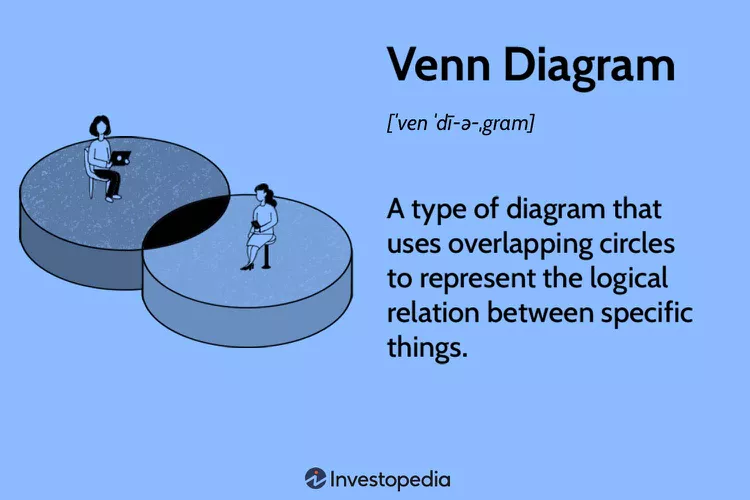

In [ ]:
import PIL.Image
img = PIL.Image.open('image.jpg')
display(img)

In [ ]:
prompt = """ This image contain sketch the objects along with some notes.
Analyze the image carefully and give me the prompt which explain the image
in json format.
Like {object: object, features : [features1, features2, features3, ...etc] }
"""

In [ ]:
response: GenerateContentResponse = model.generate_content([prompt, img])
print(response.text)

```json
{
  "object": "Venn Diagram",
  "features": [
    "Two overlapping circles representing sets",
    "A person sitting in each circle, suggesting elements of each set",
    "An area of overlap showing the intersection of the two sets",
    "The circles are 3D and presented isometrically",
    "Illustrative style, not photorealistic",
    "Text defining the Venn diagram and its purpose",
    "Investopedia branding at the bottom"
  ]
}
```
